In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
import datetime as dt
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score

In [2]:
raw_data = pd.read_csv("E:\\python\\csse_covid_19_daily_reports_us.csv")

In [3]:
raw_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [4]:
#We can see columns 'Country_Region' and 'Last_Update' have only 1 value anad hence we are not going to use these columns.
#Columns 'Lat' and 'Long_' is not providing any useful information and hence we are not using these columns.
#Column 'Province_State' and 'FIPS' are related to each other and hence we will use FIPS column only.  
#column 'UID' is Unique Identifier for each row entry. We dont see any impact of not using this column and hence we are dropping
#this column.


In [5]:
cols = ['Country_Region','Last_Update','Lat','Long_','Province_State','UID']
raw_data.drop(cols,axis=1,inplace=True)

In [6]:
raw_data.head(5)

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584


In [7]:
raw_data.dtypes

Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [8]:
raw_data.isnull().sum()

Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [9]:
#Here we can see that ther are null values in dataset and we are going to replace it with proper values

In [10]:
raw_data['Recovered']=raw_data['Recovered'].fillna(raw_data['Recovered'].mean())
#raw_data['Recovered'] = raw_data['Recovered'].apply(np.floor)

raw_data['People_Tested']=raw_data['People_Tested'].fillna(raw_data['People_Tested'].mean())
#raw_data['People_Tested'] = raw_data['People_Tested'].apply(np.floor)

raw_data['Incident_Rate']=raw_data['Incident_Rate'].fillna(raw_data['Incident_Rate'].mean())

raw_data['Hospitalization_Rate']=raw_data['Hospitalization_Rate'].fillna(raw_data['Hospitalization_Rate'].mean())

raw_data['People_Hospitalized']=raw_data['People_Hospitalized'].fillna(raw_data['People_Hospitalized'].mean())
#raw_data['People_Hospitalized'] = raw_data['People_Hospitalized'].apply(np.floor)

raw_data['Mortality_Rate']=raw_data['Mortality_Rate'].fillna(raw_data['Mortality_Rate'].mean())

raw_data['Testing_Rate']=raw_data['Testing_Rate'].fillna(raw_data['Testing_Rate'].mean())

<AxesSubplot:>

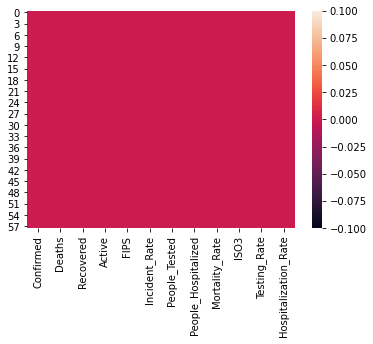

In [11]:
sns.heatmap(raw_data.isnull()) # heatmap also indicates that there are  no null values in data

In [12]:
raw_data.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,3894.186870,14.342541
std,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,1898.951207,3.781861
min,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,2741.843521,12.829963
50%,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,3501.526835,14.342541
75%,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,4622.586404,15.552021
max,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


In [13]:
# Difference between mean and STD values of columns is large indicating that data is very dispersed.
# Difference between Q3(75%) and max values of columns is large indicating that data is very dispersed and there are outliers.

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
raw_data['ISO3']=le.fit_transform(raw_data['ISO3'])
raw_data['ISO3']

0     4
1     4
2     0
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    1
15    4
16    4
17    4
18    4
19    4
20    4
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    4
29    4
30    4
31    4
32    4
33    4
34    4
35    4
36    4
37    4
38    4
39    2
40    4
41    4
42    4
43    4
44    3
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    5
53    4
54    4
55    4
56    4
57    4
Name: ISO3, dtype: int32

In [15]:
Q1=raw_data.quantile(0.25)
Q3=raw_data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Confirmed                26799.500000
Deaths                    1320.250000
Recovered                 5725.678571
Active                   18478.750000
FIPS                        29.500000
Incident_Rate              307.918843
People_Tested           217215.602679
People_Hospitalized       3442.954545
Mortality_Rate               2.334750
ISO3                         0.000000
Testing_Rate              1880.742883
Hospitalization_Rate         2.722058
dtype: float64


In [16]:
print(raw_data < (Q1 - 1.5 * IQR)) or (raw_data> (Q3 + 1.5 * IQR))

    Confirmed  Deaths  Recovered  Active   FIPS  Incident_Rate  People_Tested  \
0       False   False      False   False  False          False          False   
1       False   False      False   False  False          False          False   
2       False   False      False   False  False          False          False   
3       False   False      False   False  False          False          False   
4       False   False      False   False  False          False          False   
5       False   False      False   False  False          False          False   
6       False   False      False   False  False          False          False   
7       False   False      False   False  False          False          False   
8       False   False      False   False  False          False          False   
9       False   False      False   False  False          False          False   
10      False   False      False   False  False          False          False   
11      False   False      F

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,False,True,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,True,False,True,True,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,False,False


Confirmed                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Deaths                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Recovered               AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Active                  AxesSubplot(0.523571,0.536818;0.110714x0.343182)
FIPS                    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Incident_Rate           AxesSubplot(0.789286,0.536818;0.110714x0.343182)
People_Tested                 AxesSubplot(0.125,0.125;0.110714x0.343182)
People_Hospitalized        AxesSubplot(0.257857,0.125;0.110714x0.343182)
Mortality_Rate             AxesSubplot(0.390714,0.125;0.110714x0.343182)
ISO3                       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Testing_Rate               AxesSubplot(0.656429,0.125;0.110714x0.343182)
Hospitalization_Rate       AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

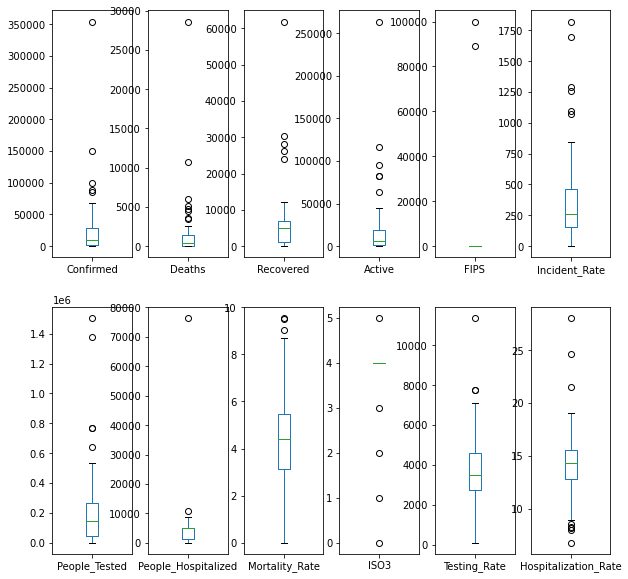

In [17]:
raw_data.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(raw_data))
z

array([[2.62999251e-01, 2.68934023e-01, 0.00000000e+00, 1.84202386e-01,
        1.90471516e-01, 3.31615693e-01, 2.11041917e-01, 3.47604767e-01,
        2.18727182e-01, 2.17198770e-01, 2.86980973e-01, 7.74497410e-01],
       [5.05788407e-01, 3.95372994e-01, 6.78047590e-01, 4.89328519e-01,
        1.90413571e-01, 8.70668532e-01, 6.48929571e-01, 0.00000000e+00,
        9.36418161e-01, 2.17198770e-01, 6.21379592e-01, 4.73806709e-16],
       [5.13484119e-01, 3.97842505e-01, 0.00000000e+00, 4.90281199e-01,
        1.87052738e-01, 1.01045759e+00, 7.75826083e-01, 0.00000000e+00,
        4.23371775e-16, 5.38170286e+00, 1.95023139e+00, 4.73806709e-16],
       [2.27418578e-01, 2.13370022e-01, 3.29519951e-01, 2.36575329e-01,
        1.90297680e-01, 4.88210372e-01, 2.07656498e-01, 3.17075993e-01,
        2.63675605e-01, 2.17198770e-01, 8.61258492e-01, 6.18955558e-01],
       [4.17470037e-01, 3.71418736e-01, 3.21471520e-01, 4.64778702e-01,
        1.90239734e-01, 5.87682563e-01, 4.45416038e-01, 4.45

In [19]:
data_new = raw_data[(z<3).all(axis = 1)]

In [20]:
data_new.shape

(49, 12)

In [21]:
raw_data.shape

(58, 12)

In [22]:
#Since data is very small and by removing outliers by zscore method, data set size is further reducing by almost 15%
# we will be using outliers in our model building process. 

In [23]:
#raw_data = data_new

In [24]:
raw_data.skew()

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [25]:
# We can see many columns have high skewness in them and hence we will need to reduce the skewness. 

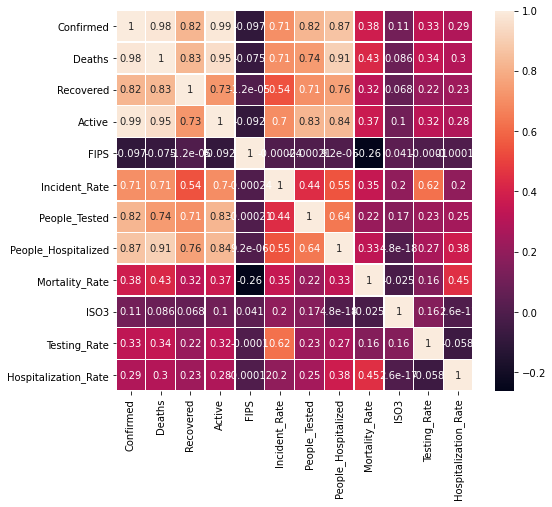

In [26]:
corr= raw_data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True,linewidths=.5)
plt.show()

In [27]:
# From above figure we can see none of the columns are having negative correlation with any column.

<AxesSubplot:ylabel='Frequency'>

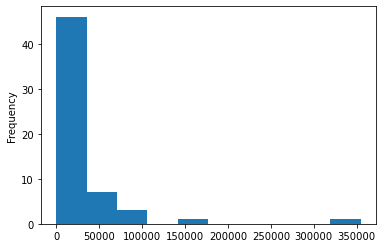

In [28]:
raw_data['Confirmed'].plot.hist() # We can see this column is right side skewed

In [29]:
raw_data.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,4,3353.942386,11.438860
1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,4,5063.940017,14.342541
2,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,0,222.857246,14.342541
3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,4,2272.859351,12.022005
4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,4,3189.670370,10.693584


In [30]:
y = raw_data.iloc[:,1:3]
y

,Deaths,Recovered
0,522,7007.428571
1,10,352.000000
2,0,7007.428571
3,747,3773.000000
4,107,3852.000000
5,3497,7007.428571
6,1299,3478.000000
7,3529,6264.000000
8,310,3965.000000
9,0,7007.428571


In [31]:
x = raw_data.drop(y,axis=1)
x

,Confirmed,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,4,3353.942386,11.438860
1,401,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,4,5063.940017,14.342541
2,0,0.0,60,0.000000,1.240000e+02,4897.454545,4.458248,0,222.857246,14.342541
3,14906,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,4,2272.859351,12.022005
4,5003,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,4,3189.670370,10.693584
5,85997,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,4,3492.893832,14.342541
6,22797,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,4,2289.339188,17.348774
7,39017,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,4,5349.302875,28.054438
8,8194,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,4,4663.552976,14.342541
9,49,49.0,88888,396.230806,2.258534e+05,4897.454545,0.000000,4,3894.186870,14.342541


In [32]:
from sklearn.preprocessing import power_transform
raw_data = power_transform(raw_data, method = 'yeo-johnson')

In [33]:
#Here we are treating skewness in data by using 'yeo-johnson' method 

In [34]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [35]:
x.shape

(58, 10)

In [36]:
from sklearn.linear_model import Lasso,Ridge

In [37]:
models = [KNeighborsRegressor(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor()]
#models = [LinearRegression()]
max_score = 0
for i in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    for j in models:
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=r2_score(pred,test_y)
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 0.9596452274040999 of model: LinearRegression() with best random state value is: 77


In [38]:
lr=LinearRegression()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
lr.fit(train_x,train_y)
predlr = lr.predict(test_x)
print("Random state used is:",final_temp_state)
print("R2 score:",r2_score(predlr,test_y))
print("Absolute squarred error:", mean_absolute_error(test_y,predlr))
print("Mean squarred error:", mean_squared_error(test_y,predlr))

Random state used is: 77
R2 score: 0.9596452274040999
Absolute squarred error: 772.7089270327986
Mean squarred error: 1240228.115094256


Text(0, 0.5, 'Predicted values')

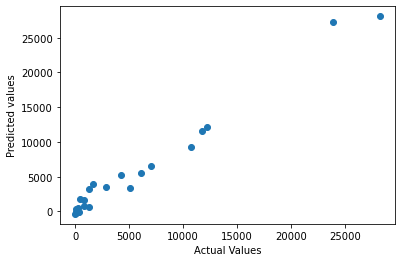

In [39]:
plt.scatter(x=test_y,y=predlr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [40]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [41]:
ls=Lasso(alpha=0.01)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)

0.9725744496217668

In [42]:
rd=Ridge(alpha=0.001)
rd.fit(train_x,train_y)
rd.score(train_x,train_y)

0.9725737419050401

In [43]:
enr=ElasticNet(alpha=0.01)
enr.fit(train_x,train_y)
enr.score(train_x,train_y)

0.9591918388149663

In [44]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [45]:
#abc = GradientBoostingRegressor(n_estimators=50,learning_rate=1)
#dtc=DecisionTreeClassifier()
#train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
#abc.fit(train_x,train_y)
#predabc = abc.predict(test_x)
#print("Predicted values using AdaBoostClassifier model:\n",predabc)
#print("Accuracy score:",accuracy_score(predabc,test_y))

#***********************************************************************************************************************
#since my target variable has 2 values/columns of deaths and recovered, Boosting algorithms are throwing error as below and
#hence Boosting algorithms are not used over here:

#ValueError: y should be a 1d array, got an array of shape (46, 2) instead.


In [46]:
cross_score=cross_val_score(ls,x,y,cv=5)
print("Cross validation score is=",cross_score)
print("Cross validation mean score is=",cross_score.mean())
print("Cross validation standard deviation score of is=",cross_score.std())

Cross validation score is= [-1.55134748  0.83517717  0.92159081  0.83752258  0.16925681]
Cross validation mean score is= 0.24243997747179363
Cross validation standard deviation score of is= 0.9369883419221873


Text(0, 0.5, 'Predicted values')

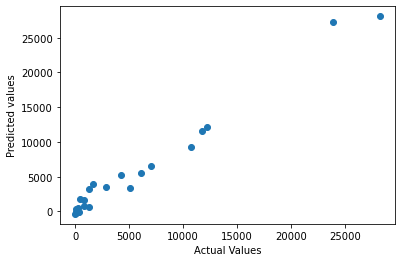

In [47]:
plt.scatter(x=test_y,y=predlr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [48]:
#In scatter plot graph we can see that the actual value and predicted values are very close to each other, which indicates
#that the line is best fit line and our model prediction is in line with actual values.

In [49]:
predls = ls.predict(test_x)

In [50]:
#Looking at the score values of above algorithms, we can see that Lasso regression model is giving the highest score
# and hence we will use this model in our final object file.

In [51]:
output_data_ls=pd.DataFrame(predls)
output_data_ls.to_csv("E:\\python\\Covid19_USA_prediction.csv",header=0)

In [52]:
import pickle
filename = 'E:\\python\\Covid19_USA_prediction.pkl'
pickle.dump(ls,open(filename,'wb'))